# Inaugural Project

Imports packages and our Python files:

In [1]:
#Import different packages

import numpy as np
import matplotlib.pyplot as plt 

# Autoreload of our model 
%load_ext autoreload
%autoreload 2

# Import our pyfiles
import HouseholdSpecializationModel as model
import Q5

# Initialize class
hsm = model.HouseholdSpecializationModelClass()
q5 = Q5.HouseholdSpecializationModelClass()


# Question 1

We are printing a tabel with the results based on the HouseholdSpecilizationModel pyfile. 

In [2]:
hsm.print_table_q1()

Table of HF/HM values:
Alpha/Sigma     0.50    1.00    1.50
----------------------------------------
      0.25 |    0.55    0.31    0.21
      0.50 |    1.00    1.00    1.00
      0.75 |    1.83    3.25    4.67


Higher homeproductive for women will lead to women working more in the home. 

The most productive side in the home will have relative more work in the home for a higher 
degree of substitution. For a higher degree of substitution it matters relatively less who specifically is working at home, just that either the men or women are doing it. 

# Question 2

We are using our code from the HouseholdSpecializationModel pyfile and printing results to plot the relationsship between the log of the relatively hours worked at home (women versus men) and the log of the relatively wages. 

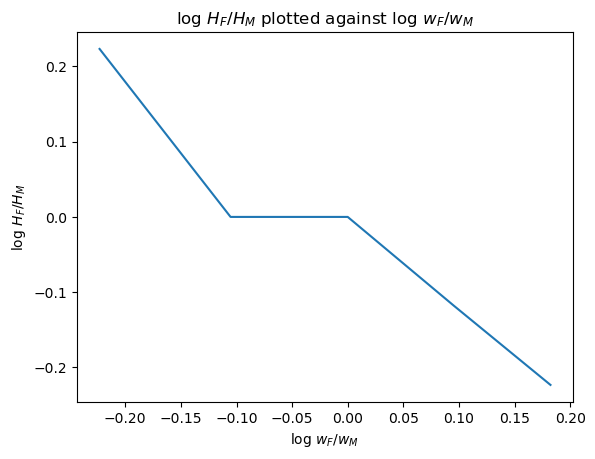

In [3]:
# a. First we create a figure object by initializing the plt.figure
fig = plt.figure() 

# b. We only add one subplot so the ax is the entire figure. 
#x-axis: we plot log(wF_vec), since wM is fixed at 1 (i.e. a numeraire)
#y-axis: We call the solve_wF_vec method from our class directly as the returns the value. 

ax = fig.add_subplot(1,1,1) 
ax.plot(np.log(hsm.par.wF_vec),hsm.solve_wF_vec(discrete=True)) #Note: Here we call the discrete solving method.

# c. Title and axis-labels
ax.set_title('log $H_F/H_M$ plotted against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #labelling x-axis
ax.set_ylabel('log $H_F/H_M$'); #labelling y-axis

**Note:** We see that a higher relative wage for women leads to women working less at home. 

If the wage is the same the hours in the home is the same. 

# Question 3

We are using the code for continuous as the hours are not longer discrete. Otherwise, we are plotting the same as in question 2. 

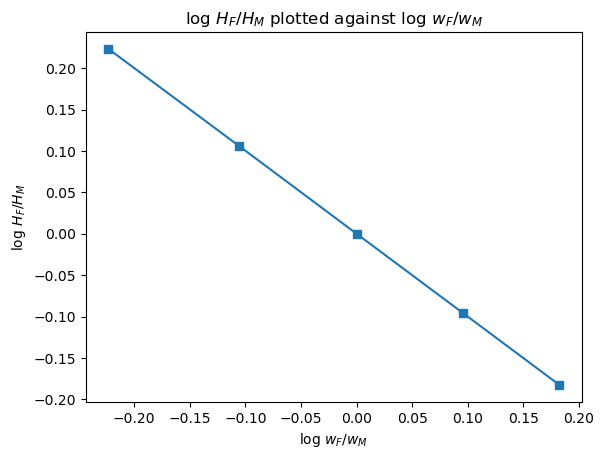

In [4]:
# a. create the figure
fig = plt.figure() 

# b. plot
ax = fig.add_subplot(1,1,1) 
#We call discrete = False, because we want it to use the continous solving method. 
ax.plot(np.log(hsm.par.wF_vec),hsm.solve_wF_vec(discrete=False),marker='s') 


ax.set_title('log $H_F/H_M$ plotted against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #labelling x-axis
ax.set_ylabel('log $H_F/H_M$'); #labelling y-axis

**Note:** We have made an initial guess that both men and women work 6 hours at work and home. To test whether we have just found a local minima, we change the initial guess to various values, and see that we get the same solution. Thus, our results are robust to the initial guess.

# Question 4

We are solving this question by the algorithm described below. 

**Problem:** Finding the $\alpha$ and $\sigma$ that minimizes the target function given in question 4.

**Inputs:** A vector for the wage for woman, wF_Vec. Further, the $\beta_0$ and $\beta_1$ from the empirical study. 

**Outputs:** The optimal $\alpha$, $\sigma$, $\hat{\beta_0}$, $\hat{\beta_1}$ and value of target function. The $\beta$'s comes from the run_regression function, but is based on the estimates of $\alpha$ and $\sigma$

**Algorithm:** `solve_optimal_alpha_sigma`

1. Defining the target function as: $(\beta_0-\hat{\beta_0})^2+(\beta_1-\hat{\beta_1})^2$
2. We use the function solve_wF_vec to solve for the wage for given values of $\alpha$ and $\sigma$. We are doing it in the continuous case as in question 3. The method is the same, the only different is that values of $\alpha$ and $\sigma$ can change. 
3. Running a regression based on the solution from step 2. The results are $\hat{\beta_0}$ and $\hat{\beta_1}$. 
4. Minimizing the target function defined in step 1 with respect to $\alpha$ and $\sigma$. This is done with the Nelder-Mead function in scipy. The $\alpha$ and $\sigma$ will change the estimates in the step 3 and hereby we can find the optimal $\hat{\beta_0}$ and $\hat{\beta_1}$. 
5. In order to avoid finding local minima for our results  we are using different initial guess for the function. We are looping over 10 different seeds, which determines the initial guess (1 to 10)
  * If the target function from the new seed is lower. We keep the values
  * If target function from the new seed is higher, we discard the values. 
6. Saving the values with the lowest target function value. 

In [5]:

#Setting initial values. 
target_best=10**6
alpha_best=np.nan
sigma_best=np.nan

beta0_best=0
beta1_best=1

#Making the loop with different initial seeds in order to decrease the risk of local minima. Step 5 in the described algorithm. 
for i in [1,2,3,4,5,6,7,8,9,10]:   
    alpha,sigma,target=hsm.solve_optimal_alpha_sigma(i)
    if target<target_best:
        target_best=target
        alpha_best=alpha
        sigma_best=sigma
        log_HF_HM_best=hsm.solve_wF_vec(discrete=False)

#Note: We get an error, but the target function seems to be close to zero, so we ignore the error. 

#Restore originally values
hsm.par.alpha=0.5
hsm.par.sigma=1


c:\Users\Ander\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
c:\Users\Ander\OneDrive - University of Copenhagen\Kandidat\1. semester\Introduction to Programming and Numerical Analysis\Python\projects-2023-andershuus_christianfogel\inauguralproject\HouseholdSpecializationModel.py:81: RuntimeWarning: overflow encountered in double_scalars
  H= ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


In [6]:
#Calculating the estimated value of beta0 and beta1 for the optimal values of alpha and sigma
beta0_best,beta1_best = hsm.run_regression(alpha_best, sigma_best)

#Printing results. 
print(f'The optimal value of alpha is: {alpha_best:.3f}')    
print(f'The optimal value of sigma is: {sigma_best:.3f}')
print(f'The value of the estimated beta0 is:  {beta0_best:.3f}')
print(f'The value of the estimated beta1 is: {beta1_best:.3f}')
print(f'Target function value:  {target_best:.5f}')

The optimal value of alpha is: 0.982
The optimal value of sigma is: 0.100
The value of the estimated beta0 is:  0.400
The value of the estimated beta1 is: -0.100
Target function value:  0.00000


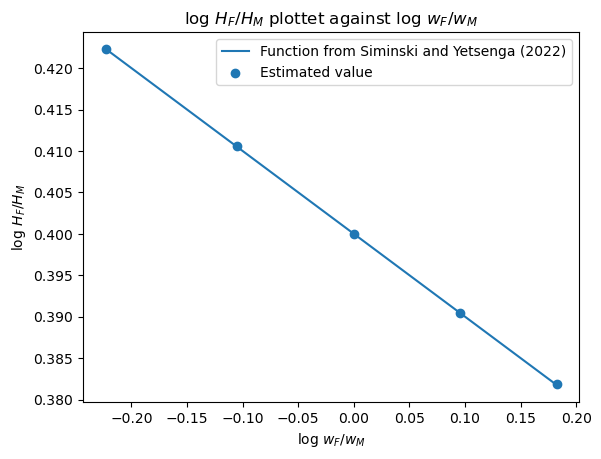

In [7]:
# a. create a figure
fig = plt.figure() 

# b. plot
ax = fig.add_subplot(1,1,1) 

#x-axis: Same as in question 2 and 3
#y-axis: We are plotting the function from the paper.
ax.plot(np.log(hsm.par.wF_vec),hsm.par.beta0_target+hsm.par.beta1_target*np.log(hsm.par.wF_vec),label='Function from Siminski and Yetsenga (2022)') 

#We are making our vector as a scatter plot to compare the results. 
ax.scatter(np.log(hsm.par.wF_vec),log_HF_HM_best, label='Estimated value')
ax.legend()

ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

We can see our estimates are in line with the empirical paper. Interestingly in order to get this, 
we get a value of alpha equal to 0.98. Which suggest that women are far more productive at home than men. 
Further, we get a low elasticity of substitution. One option could therefore be that our model have left out
important factors if we assume women are not radically more productive at home than men. 

The low degree of substitution is also the reason for a flat slope compared to exercise 2 and 3
as it is more difficult for households to react on changes in the relative wages. 

# Question 5

To solve the problem we come up with a new parameter $\psi$ in the utility function. This is to model higher disutility working at home for men compared to women. This gives the folllowing utility function: 
$$
\begin{aligned}
\frac{Q^{1-\rho}}{1-\rho}-\nu\left(\frac{T_{M}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{T_{F}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}\right)-\psi H_M,\,\rho>1,\nu>0,\epsilon>0
\end{aligned}
$$

$\psi$ is expected to be bigger than 0 as we need an explaination for men to work less at home than what we see in question 4. However, we will not make it is a bound, because the theory does not give incentive to such a constraint. 

The algorithm is the same as in question 4. However, with the important difference that we optimize over $\psi$ instead of $\alpha$ now. But, it is not changing the structure of the code. For the code we refer to pyfile Q5. 

In [8]:

#Setting initial values. 
target_best_Q5=10**6
sigma_best_Q5=np.nan
psi_best_Q5=np.nan

beta0_best_Q5=0
beta1_best_Q5=1

#Making the loop with different initial seeds in order to decrease the risk of local minima. Step 5 in the described algorithm. 
for i in [1,2,3,4,5,6,7,8,9,1000]:   
    sigma,psi,target=q5.solve_optimal_sigma_psi(i)
    if target<target_best_Q5:
        target_best_Q5=target
        sigma_best_Q5=sigma
        psi_best_Q5=psi
        log_HF_HM_best_Q5=q5.solve_wF_vec()

#Note: We get an error, but the target function seems to be close to zero, so we ignore the error. 

#Restore originally values
q5.par.sigma=1
q5.par.psi=0.5

c:\Users\Ander\OneDrive - University of Copenhagen\Kandidat\1. semester\Introduction to Programming and Numerical Analysis\Python\projects-2023-andershuus_christianfogel\inauguralproject\Q5.py:85: RuntimeWarning: overflow encountered in double_scalars
  H= ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


In [9]:
#Calculating the estimated value of beta0 and beta1 for the optimal values of alpha and sigma
beta0_best_Q5,beta1_best_Q5 = q5.run_regression(sigma_best_Q5,psi_best_Q5)

#Printing results.   
print(f'The optimal value of sigma is: {sigma_best_Q5:.3f}')
print(f'The optimal value of psi is: {psi_best_Q5:.3f}')
print(f'The value of the estimated beta0 is:  {beta0_best_Q5:.3f}')
print(f'The value of the estimated beta1 is: {beta1_best_Q5:.3f}')
print(f'Target function value:  {target_best_Q5:.5f}')

The optimal value of sigma is: 0.195
The optimal value of psi is: 0.056
The value of the estimated beta0 is:  0.400
The value of the estimated beta1 is: -0.100
Target function value:  0.00000


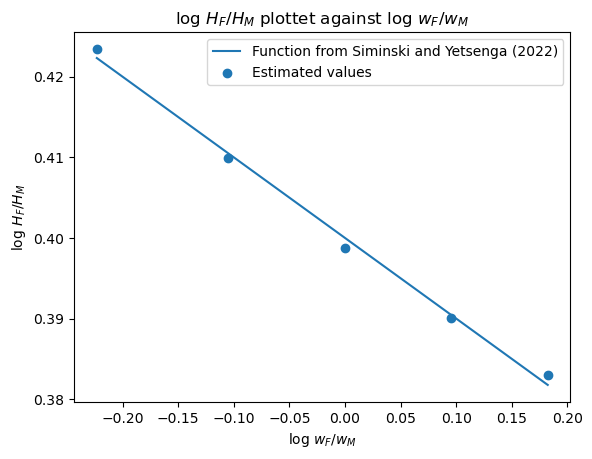

In [10]:
# a. create a figure
fig = plt.figure() 

# b. plot
ax = fig.add_subplot(1,1,1) 

#x-axis: Same as in question 2 and 3
#y-axis: We are plotting the function from the paper.
ax.plot(np.log(hsm.par.wF_vec),hsm.par.beta0_target+hsm.par.beta1_target*np.log(hsm.par.wF_vec),label='Function from Siminski and Yetsenga (2022)') 
#We are making our vector as a scatter plot to compare the results. 
ax.scatter(np.log(hsm.par.wF_vec),log_HF_HM_best_Q5,label='Estimated values') 

ax.legend()

ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

We see that the new model almost fits the data. Therefore, extra disutility from working at home for men does that we can match the result from the paper even when men and women are equally productive at home. It should be stressed that extra disutility should be interpreted broadly and could also be underlying structures in the society, which does that men are discouraged from working at home. 

With this model the degree of substitution is also sligthly higher. 